<h1> Problema de las N-reinas: implementaciones y acercamientos a algoritmos orientados a la resolución del problema.</h1>
<p><h6 align='center'> Buscamos implementar y contrastar distintos algoritmos que nos permitieran resolver el 
problema de las N-reinas con las restricciones originales del problema, a su vez indagamos en 
las distintas tecnicas de solución que se han propuesto hasta el dia de hoy y como muchos han optado
por algoritmos que satisfacen este problema viendo la aplicabilidad en distintos campos</h6></p>

<p>Los algoritmos implementados en la resolución del problema de las N reinas, fueron los siguientes:</p>
<li> Implementación del algoritmo de sosic y jun gu </li>
<li> Implementación del algoritmo Hill climbing juntos con tres variaciones en busca del minimo conflicto</li>
<li> Implementación del algoritmo backtracking y una variación optimizando con branch and bound</li>


<h3>Implementación del algoritmo de Sosic y Jun Gu</h3>

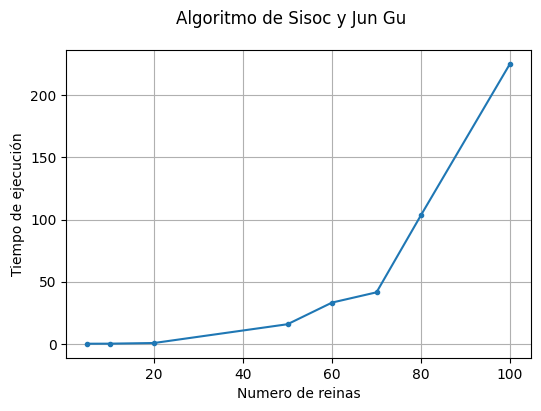

In [2]:
import csv
import matplotlib.pyplot as plt

dataTimeSosicgau = csv.reader(open('AlgorithmTimeData/Sosic_Gu.csv'))
results = [] #primer arreglo indexado corresponde al tiempo y el segundo a a la  salida de tiempo del programa
for row in dataTimeSosicgau:
    if row != []:
        for x in row:
            results.append([i for i in x.split(';') if i!='' ])
time = [float(results[0][i]) for i in range(1,len(results[0]))]
n_queens = [int(results[1][i]) for i in range(1,len(results[1]))]
plt.figure(figsize=(6,4))
plt.grid()
plt.plot(n_queens,time,marker='.')
plt.xlabel("Numero de reinas")
plt.ylabel("Tiempo de ejecución")

plt.suptitle("Algoritmo de Sisoc y Jun Gu")
plt.show()


<b>Consumo de memoria del algoritmo Sosic y Jun Gu variando el numero N de reinas a asignar en el tablero:</b>

In [1]:
import pandas as pd

tiempos_ejec = [['','','','','','','','','','','TP:'],[0.0068,0.0073,0.0075,0.0083,0.0075,0.0078,0.0080,0.0071,0.0087,0.0119,0.0081],[0.0543,0.0652,0.0507,0.0523,0.0524,0.0504,0.0617,0.0498,0.0510,0.0649,0.0552],[0.5513,0.5687,0.5205,0.5311,0.5102,0.5191,1.0378,0.5405,0.5246,0.5512,0.5855],[16.4166,15.5497,15.2237,15.5749,15.6378,14.9747,14.6506,14.6884,15.0245,19.3652,15.7106],[30.3789,36.8022,33.6166,33.4303,32.099,32.5657,33.1107,33.5335,33.3450,31.3472,32.5233],[55.3879,54.6672,55.1413,62.3840,59.1726,54.0110,57.4852,57.5426,54.1711,64.8226,57.4785],[120.8846,91.9703,118.2620,99.2757,98.2921,108.1222,93.2932,112.1614,98.9293,94.6908,103.588],[217.3795,218.488,209.2160,211.501,274.0515,239.213,232.6507,282.7064,268.6751,248.6715,232]]
n_reinas = ['N:',5,10,20,50,60,70,80,100]
df = pd.DataFrame()
df[n_reinas[0]] = tiempos_ejec[0]
df[n_reinas[1]] = tiempos_ejec[1]
df[n_reinas[2]] = tiempos_ejec[2]
df[n_reinas[3]] = tiempos_ejec[3]
df[n_reinas[4]] = tiempos_ejec[4]
df[n_reinas[5]] = tiempos_ejec[5]
df[n_reinas[6]] = tiempos_ejec[6]
df[n_reinas[7]] = tiempos_ejec[7]
df[n_reinas[8]] = tiempos_ejec[8]

print(df)

     N:       5      10      20       50       60       70        80       100
0        0.0068  0.0543  0.5513  16.4166  30.3789  55.3879  120.8846  217.3795
1        0.0073  0.0652  0.5687  15.5497  36.8022  54.6672   91.9703  218.4880
2        0.0075  0.0507  0.5205  15.2237  33.6166  55.1413  118.2620  209.2160
3        0.0083  0.0523  0.5311  15.5749  33.4303  62.3840   99.2757  211.5010
4        0.0075  0.0524  0.5102  15.6378  32.0990  59.1726   98.2921  274.0515
5        0.0078  0.0504  0.5191  14.9747  32.5657  54.0110  108.1222  239.2130
6        0.0080  0.0617  1.0378  14.6506  33.1107  57.4852   93.2932  232.6507
7        0.0071  0.0498  0.5405  14.6884  33.5335  57.5426  112.1614  282.7064
8        0.0087  0.0510  0.5246  15.0245  33.3450  54.1711   98.9293  268.6751
9        0.0119  0.0649  0.5512  19.3652  31.3472  64.8226   94.6908  248.6715
10  TP:  0.0081  0.0552  0.5855  15.7106  32.5233  57.4785  103.5880  232.0000


<h3>Implementación del algoritmos Hill Climbing junto con dos variantes</h3>
<h4>Implementación primer version algoritmo Hill Climbing</h4>

En este caso, se implementó el algoritmo **min-conflicts** de tipo *hill-climbing*. El algoritmo consiste en, primeramente generar un estado inicial de manera aleatoria asignando una reina por fila pero eligiendo al azar la columna en la que ubicaremos.

In [2]:
import random

# State class
class state:
    def __init__ (self,queens,n):
        self.queens = queens
        self.n = n
        self.matrix = self.matrix_generation()      # Calls the function that generates the matrix
        self.columns = self.columns()               # Calls the functions that keep track of the amount of 
        self.diagonals = self.diagonals()           # queens in each column and diagonal
        
    def matrix_generation(self):                    # Generating the state matrix
        matrix = []
        for x in range(0,n):
            matrix.append([0]*n)
        for q in queens:
            matrix[q[0]][q[1]] = 1
        return matrix
    
    def columns(self):                          # Function that stores the amount of queens in each column
        columns = [0]*n
        for q in queens:
            columns[q[1]] += 1
        return columns
            
    def diagonals(self):                                        # Function that stores the amount of queens in each diagonal
        diagonals = []                                          # diagonals[0] --> down diagonals
        diagonals.append([0]*(n+1))                             # diagonals[1] --> up diagonals
        diagonals.append([0]*(n+1))
        for q in queens:
            if (q[0]-q[1])+2 <= n:
                diagonals[0][(q[0]-q[1])+2] += 1                # adds one to the down diagonal
            if (((q[0]+q[1])-1) >= 0) and (((q[0]+q[1])-1)<=n):
                diagonals[1][(q[0]+q[1])-1] += 1                # adds one to the up diagonal
            
        return diagonals 

n = 4    
    
#Genariting randomly the initial state      
queens = []
for x in range (0,n):
    xth_queen = (x,random.randint(0,n-1))
    queens.append(xth_queen)
    
initial_state = state(queens, n)
print(initial_state.queens)

[(0, 0), (1, 2), (2, 0), (3, 1)]


Una vez tenemos nuestro estado incial, hacemos la llamada a nuestra implementación del algoritmo. El algoritmo empieza calculando, con la ayuda de la función `move_queen()` todas las posibles nuevas posiciones en las que podemos poner a cada una de las $n$ reinas, manteniendo a cada una en la misma fila, moviéndola únicamente de columna.

In [3]:
def move_queen (q):                             # this function returns all the posible column positions where we can move a queen
    new_queens = []
    for x in range(0,n):
        if x != q[1]:
            new_queens.append((q[0],x))
    return new_queens

queen_ej = (2,1)
print(move_queen(queen_ej))

[(2, 0), (2, 2), (2, 3)]


Hacemos esto para nuestras $n-1$ reinas restantes dándomos como resultado un total de $n(n-1)$ nuevos estados

In [4]:
import copy

def algorithm(initial_state):
    current_state = initial_state
    
    new_states_queens = []                                                  # here we store all the posible new state queen's configurations

    for q in current_state.queens:                                          # we do this for each one of the n queens
        moved_q = move_queen(q)                                             # call the move_queen function
        state_queens = copy.deepcopy(current_state.queens)  
        state_queens.remove(q)                                              # Removes q's original position

        for i in moved_q:                                                   # for every queen's possible new position we create a new configuration
            state_queens.insert(q[0],i)
            new_states_queens.append(copy.deepcopy(state_queens))           # we store the n queens positions
            state_queens.remove(i)
            
    return new_states_queens

print("Initial state: ", initial_state.queens)        
print("Subsequent states: ", algorithm(initial_state))

Initial state:  [(0, 0), (1, 2), (2, 0), (3, 1)]
Subsequent states:  [[(0, 1), (1, 2), (2, 0), (3, 1)], [(0, 2), (1, 2), (2, 0), (3, 1)], [(0, 3), (1, 2), (2, 0), (3, 1)], [(0, 0), (1, 0), (2, 0), (3, 1)], [(0, 0), (1, 1), (2, 0), (3, 1)], [(0, 0), (1, 3), (2, 0), (3, 1)], [(0, 0), (1, 2), (2, 1), (3, 1)], [(0, 0), (1, 2), (2, 2), (3, 1)], [(0, 0), (1, 2), (2, 3), (3, 1)], [(0, 0), (1, 2), (2, 0), (3, 0)], [(0, 0), (1, 2), (2, 0), (3, 2)], [(0, 0), (1, 2), (2, 0), (3, 3)]]


Luego, para cada una de las nuevas configuraciones contaremos el número de conflictos presentes en esta con ayuda de la función `conflict_count_1st()`.

In [5]:
# Conflict count first version
def conflict_count_1st(queens):
    conflicts = 0
    for q in queens:
        for k in queens:                                    # checks every other queen
            if k != q:
                if q[1] == k[1]:                            # checks queen's column
                    conflicts += 1
                if abs(q[0]-k[0]) == abs(q[1]-k[1]):        # checks both queen's diagonals at the same time
                    conflicts += 1
    return conflicts

print(int(conflict_count_1st(initial_state.queens)/2))

2


Por último, guardamos este número en una lista para posteriormente poder escoger la configuración que genere la mínima cantidad de conflictos. Convertimos a esta configuración en el nuevo estado actual y seguimos corriendo el algoritmo siempre y cuando este nuevo número de conflictos sea diferente a 0.

In [6]:
# Function that helps us find all the indices where a certain element is stored at on a list
def find_indices(list_to_check, item_to_find):
    return [idx for idx, value in enumerate(list_to_check) if value == item_to_find]

# First version
def first_version(initial_state, steps):
    current_state = initial_state
    while conflict_count_1st(current_state.queens) != 0:                        # it keeps running while the number of conflicts is different than 0
    
        new_states_queens = []                                                  # here we store all the posible new state queen's configurations
        conflicts = int(conflict_count_1st(current_state.queens)/2)
        for q in current_state.queens:                                          # we do this for each one of the n queens
            moved_q = move_queen(q)                                             # call the move_queen function
            state_queens = copy.deepcopy(current_state.queens)  
            state_queens.remove(q)                                              # Removes q's original position

            for i in moved_q:                                                   # for every queen's possible new position we create a new configuration
                state_queens.insert(q[0],i)
                new_states_queens.append(copy.deepcopy(state_queens))           # we store the n queens positions
                state_queens.remove(i)
    
        conflicts_number = []
         
        for n_queens in new_states_queens:                                      # for each queens configuration we calculate the number
            conflicts_number.append(int(conflict_count_1st(n_queens)/2))        # of conflicts and we store them in a list
        
        indexes_min = find_indices(conflicts_number, min(conflicts_number))
        random_index = random.randint(0,len(indexes_min)-1)
        index = indexes_min[random_index]                                       # we select the index randomly for not always select the same configuration
        steps.append(new_states_queens[index])
        current_state.queens = copy.deepcopy(new_states_queens[index])          # we change the queens position of the current state 
                                                                                # to the one that causes the less conflicts 
    return steps

steps = [queens]
final_steps = first_version(initial_state, steps)
print("Arreglo inicial: ", final_steps[0])
print("Solución: ", final_steps[len(final_steps)-1])
print("Pasos realizados: ", len(final_steps))

Arreglo inicial:  [(0, 0), (1, 2), (2, 0), (3, 1)]
Solución:  [(0, 2), (1, 0), (2, 3), (3, 1)]
Pasos realizados:  4


A continuación, presentamos reflejados los resultados obtenidos después de 100 experimentos para distintos valores de $n$.

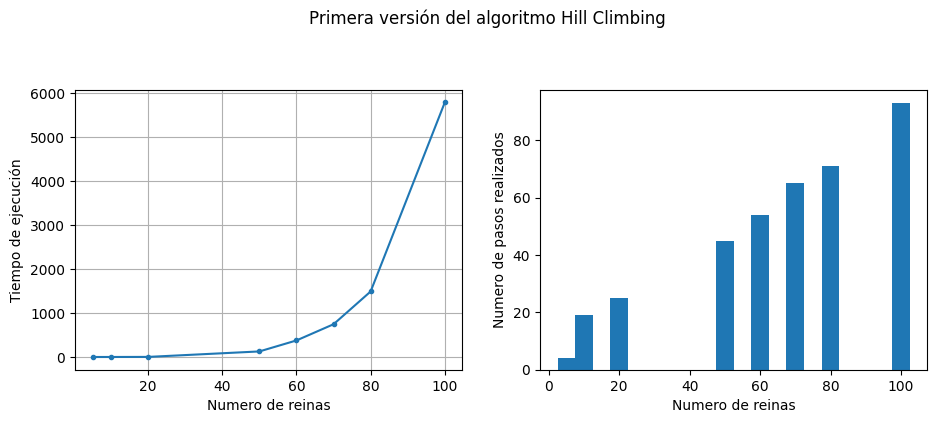

In [12]:
import csv
import matplotlib.pyplot as plt
dataHillClimbing = csv.reader(open('AlgorithmTimeData/HillCimbing.csv'))
results = [] #primer arreglo indexado corresponde al tiempo, el segundo salida de tiempo del programa y tercero el numero de pasos ejecutados
for row in dataHillClimbing:
    if row != []:
        for x in row:
            results.append([i for i in x.split(';') if i!='' ])
time = [float(results[0][i]) for i in range(1,len(results[0]))]
n_queens = [float(results[1][i]) for i in range(1,len(results[1]))]
steps = [float(results[2][i]) for i in range(1,len(results[2]))]
plt.figure(figsize=(11,8))
plt.subplot(2,2,1)
plt.grid()
plt.plot(n_queens,time,marker='.')
plt.xlabel("Numero de reinas")
plt.ylabel("Tiempo de ejecución")
plt.subplot(2,2,2)
plt.bar(n_queens,steps,width=5)
plt.ylabel("Numero de pasos realizados")
plt.xlabel("Numero de reinas")
plt.suptitle("Primera versión del algoritmo Hill Climbing")
plt.show()


<h4>Implementación variaciones del algoritmo Hill Climbing</h4>

Es claro que la forma en la que atacamos el problema de contar los conflcitos resulta en una complejidad de O($n^2$) por lo que para nuestra segunda versión del algoritmo cambiamos la manera en la que los contamos. Ahora, la clase estado tiene funciones que ayudan a tener presente el número de reinas que hay en cada columna y en cada diagonal, lo que convierte al problema en uno de búsqueda y basta con solo verificar el número de conflictos presentes para cada reina con verificar los casos en que se encuentra más de una reina en su columna y sus diagonales.

In [8]:
# Conflict count second version

def conflict_count_2nd(state):
    conflicts = 0;
    for q in state.queens:
        if state.columns[q[1]] > 1:                                     # checks the amount of queens in q's column
            conflicts += (state.columns[q[1]]-1)
        if ((q[0]-q[1])+2) <= n:                                        
            if state.diagonals[0][(q[0]-q[1])+2] > 1:                   # checks the amount of queens in q's down diagonal
                conflicts += (state.diagonals[0][(q[0]-q[1])+2]-1)
        if (((q[0]+q[1])-1) >= 0) and (((q[0]+q[1])-1)<=n):
            if state.diagonals[1][(q[0]+q[1])-1] > 1:                   # cheks the amount of queens in q's up diagonal
                conflicts += (state.diagonals[1][(q[0]+q[1])-1]-1)
    return conflicts

# Second version
def second_version(initial_state, steps):
    current_state = initial_state
    while conflict_count_2nd(current_state) != 0:                           # it keeps running while the number of conflicts is different than 0
    
        new_states_queens = []                                              # here we store all the posible new state queen's configurations
        
        for q in current_state.queens:                                      # we do this for each one of the n queens
            moved_q = move_queen(q)                                         # call the move_queen function
    
            for i in moved_q:                                               # for every queen's possible new position we create a configuration
                state_queens = []
                for p in range(0,n):
                    if p != q[0]:
                        state_queens.append(current_state.queens[p])
                state_queens.insert(q[0],i)
                new_states_queens.append(state_queens)                      # we store the n queens position
    
        conflicts_number = []
         
        for n_queens in new_states_queens:                                  # we calculate and store the number of conflicts for every
            new_state = state(n_queens,n)                                   # different configuration with the improved version of conflict counting
            n_conflicts = copy.deepcopy(conflict_count_2nd(new_state))                                                      
            conflicts_number.append(n_conflicts/2)                            
    
        steps.append(new_states_queens[conflicts_number.index(min(conflicts_number))])
        current_state.queens = new_states_queens[conflicts_number.index(min(conflicts_number))]     # we change the queens position of the current state
                                                                                                    # to the one that causes the less conflict
    return steps

final_steps = second_version(initial_state, steps)
print("Arreglo inicial: ", final_steps[0])
print("Solución: ", final_steps[len(final_steps)-1])
print("Pasos realizados: ", len(final_steps))

Arreglo inicial:  4
Solución:  [(0, 2), (1, 1), (2, 3), (3, 2)]
Pasos realizados:  10


Por último, para la tercera versión, propusimos una mejora más. En vez de buscar todos los estados posibles y luego hallar el que tenga el menor número de conflictos, vamos a ir hallándolos uno por uno y nos detendremos cuando encontremos uno con un número menor de conflictos a los del estado actual. Esto en teoría traería una mejora significativa ya que en vez de hallar los $n(n-1)$ estados posibles podríamos estar calculando muchos menos. El problema se presenta que en nuestra hipótesis no estamos teniendo en cuenta el hecho de que es posile que ninguno de los estados resulte en algua especie de mejora en cuanto al número de conflictos por lo que terminaríamos buscando de igual manera todas las posibilidades sin poder establecer un nuevo estado de manera satisfactoria. La estrategia que propusimos fue ir guardando en una lista las configuraciones que resulten en un número igual de conflictos y en caso de no encontrar algún estado que nos sirva, elegiremo uno de esta lista de manera aleatoria.

In [9]:
def third_version(initial_state, steps):
    current_state = initial_state
    while conflict_count_2nd(current_state) != 0:                                           # it keeps running while the number of conflicts is different than 0
    
        flag = False                                                                        # flag that indicates if it has found a lower conflicts state
        equal_states = []
        
        for q in current_state.queens:                                                      # we do this for each one of the n queens
            if flag:
                break
            moved_q = move_queen(q)                                                         # call the move_queen function
            state_queens = copy.deepcopy(current_state.queens)
            state_queens.remove(q)                                                          # removing q's original position
    
            for i in moved_q:                                                               # for every queen's possible new position we create a new configuration
                state_queens.insert(q[0],i)
                new_state = state(state_queens,n)
                n_conflicts = copy.deepcopy(conflict_count_2nd(new_state))                  # counts the conflicts for that configuration
                if n_conflicts < conflict_count_2nd(current_state):                         # if it's lower than the current conflicts number
                    steps.append(state_queens) 
                    current_state.queens = copy.deepcopy(state_queens)                      # it becomes the new current state's configuration                     
                    flag = True  
                    break
                if n_conflicts == conflict_count_2nd(current_state):                        # if it's equal to the current conflicts number
                    equal_states.append(copy.deepcopy(state_queens))                        # it saves this configuration in a list
                state_queens.remove(i)
            
        if not flag:                                                                        # if a lower conflicts configuration was not found
            random_index = random.randint(0,len(equal_states)-1)                
            steps.append(equal_states[random_index])        
            current_state.queens = copy.deepcopy(equal_states[random_index])                # it sets a random configuration selected from the equal conflicts number configuration         
              
    return steps  

final_steps = second_version(initial_state, steps)
print("Arreglo inicial: ", final_steps[0])
print("Solución: ", final_steps[len(final_steps)-1])
print("Pasos realizados: ", len(final_steps))

Arreglo inicial:  4
Solución:  [(0, 2), (1, 1), (2, 3), (3, 2)]
Pasos realizados:  10


A continuación mostramos una recompilación de los resultados obtenidos para diferentes valores de $n$ para cada una de las variaciones propuestas del algoritmo original

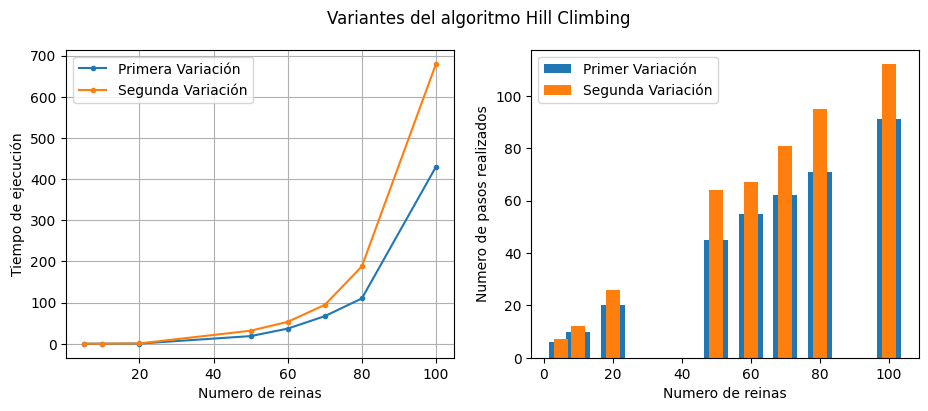

In [11]:
import csv
dataHillClimbing_Variante = csv.reader(open('AlgorithmTimeData/HillClimbing_variantes.csv'))
results = [] 
for row in dataHillClimbing_Variante:
    if row != []:
        for x in row:
            results.append([i for i in x.split(';') if i!='' ])

n_queens = [int(results[len(results)-1][i]) for i in range(1,len(results[4]))]
time_primeraVer = [float(results[0][i]) for i in range(1,len(results[0]))]
steps_primeraVer = [float(results[1][i]) for i in range(1,len(results[1]))]
time_segundaVer = [float(results[2][i]) for i in range(1,len(results[2]))]
setps_segundaVer = [float(results[3][i]) for i in range(1,len(results[3]))]

plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.grid()
plt.plot(n_queens,time_primeraVer,marker='.',label="Primera Variación")
plt.plot(n_queens,time_segundaVer,marker='.',label="Segunda Variación")
plt.xlabel("Numero de reinas")
plt.ylabel("Tiempo de ejecución")
plt.legend()

plt.subplot(1,2,2)
plt.bar(n_queens,steps_primeraVer,width=7,label="Primer Variación")
plt.bar(n_queens,setps_segundaVer,width=4,label="Segunda Variación")
plt.ylabel("Numero de pasos realizados")
plt.xlabel("Numero de reinas")
plt.legend()

plt.suptitle("Variantes del algoritmo Hill Climbing")
plt.show()